### Ising model
Theory and implementation:
http://www.bdhammel.com/ising-model/

Implementation: only random initial state

### Potts model
Theory:
https://en.wikipedia.org/wiki/Potts_model

Number of states: 3

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
%matplotlib inline

In [11]:
class IsingLattice:

    def __init__(self, temperature, size):
        self.size = size
        self.T = temperature
        self.system = self._build_system()

    @property
    def sqr_size(self):
        return (self.size, self.size)

    def _build_system(self):
        """Build the system
        Build a randomly distributed system
        """

        system = np.random.choice([-1, 1], self.sqr_size)

        return system

    def _bc(self, i):
        """Apply periodic boundary condition
        Check if a lattice site coordinate falls out of bounds. If it does,
        apply periodic boundary condition
        Assumes lattice is square
        Parameters
        ----------
        i : int
            lattice site coordinate
        Return
        ------
        int
            corrected lattice site coordinate
        """
        if i >= self.size:
            return 0
        if i < 0:
            return self.size - 1
        else:
            return i
    
    def energy(self, N, M):
        """Hamiltonian. Calculate the energy of spin interaction at a given lattice site
        i.e. the interaction of a Spin at lattice site n,m with its 4 neighbors
        - S_n,m*(S_n+1,m + Sn-1,m + S_n,m-1, + S_n,m+1)
        
        Parameters
        ----------
        N : int
            lattice site coordinate
        M : int
            lattice site coordinate
        Return
        ------
        float
            energy of the site
        """
        return -2*self.system[N, M]*(
            self.system[self._bc(N - 1), M] + self.system[self._bc(N + 1), M]
            + self.system[N, self._bc(M - 1)] + self.system[N, self._bc(M + 1)]
        )

    @property
    def internal_energy(self):
        e = 0
        E = 0
        E_2 = 0

        for i in range(self.size):
            for j in range(self.size):
                e = self.energy(i, j)
                E += e
                E_2 += e**2

        U = (1./self.size**2)*E
        U_2 = (1./self.size**2)*E_2

        return U, U_2

    @property
    def heat_capacity(self):
        U, U_2 = self.internal_energy
        return U_2 - U**2

    @property
    def magnetization(self):
        """Find the overall magnetization of the system
        """
        return np.abs(np.sum(self.system)/self.size**2)

In [12]:
def run(lattice, epochs):
    """Run the simulation
    """
          
    cmap = matplotlib.cm.Blues
    
    for epoch in range(epochs):
        
        # Randomly select a site on the lattice
        N, M = np.random.randint(0, lattice.size, 2)

        # Calculate energy of a flipped spin
        E = -1*lattice.energy(N, M)

        # "Roll the dice" to see if the spin is flipped
        if E <= 0.:
            lattice.system[N, M] *= -1
        elif np.exp(-E/lattice.T) > np.random.rand():
            lattice.system[N, M] *= -1

        if epoch % 1000 == 0:
            plt.figure(figsize=(10,10))
            plt.imshow(lattice.system, interpolation='nearest', cmap=cmap)
            plt.show()
            clear_output(wait=True)

In [13]:
# set parameters

t = 1        # temperature 
s = 150      # number of sites (s x s lattice)
e = 1000000  # number of iterations

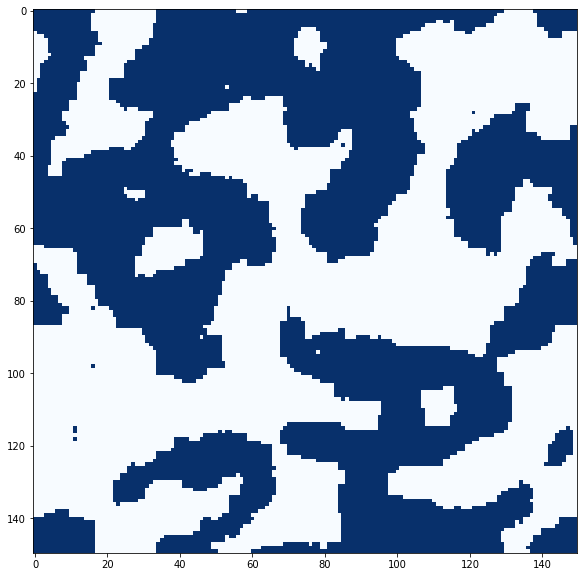

In [14]:
lattice = IsingLattice(
        temperature=t, size=s
    )
run(lattice, e)